In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('CompleteDataset.csv')
df = df.dropna() #all Keepers have 0 in dataframe so they will be dropped
#df.head(8)

/Users/jessereessink/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [4]:
X = df.loc[:,"Acceleration":"Finishing"]
y = df['Potential'] #create the y-variable
#X.head()

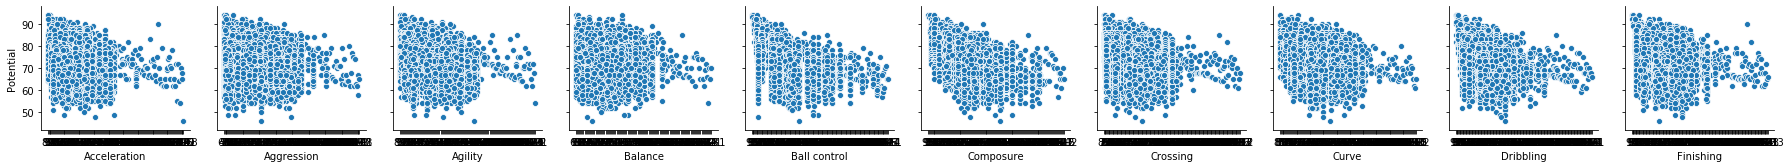

In [5]:
sns.pairplot(df,
             y_vars=["Potential"],
             x_vars=['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control','Composure','Crossing','Curve','Dribbling','Finishing'])
#plt.show()

In [6]:
df_subset = df[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control','Composure','Crossing','Curve','Dribbling','Finishing']]
df_subset['preferred'] = df['Preferred Positions'].str.split(' ').str[0]
df = df.dropna()
#df_subset.head(8)

/Users/jessereessink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Select 7 variables with strong predictive value

# Which dataset and variables you selected and why
#### I selected the skills of the footballers, this skills might give a good indication of what type op position they prefer 

In [7]:
df_subset['Acceleration'] = df_subset['Acceleration'].astype(str).str[:2]
df_subset['Aggression'] = df_subset['Aggression'].astype(str).str[:2]
df_subset['Agility'] = df_subset['Agility'].astype(str).str[:2]
df_subset['Balance'] = df_subset['Balance'].astype(str).str[:2]
df_subset['Ball control'] = df_subset['Ball control'].astype(str).str[:2]
df_subset['Composure'] = df_subset['Composure'].astype(str).str[:2]
df_subset['Crossing'] = df_subset['Crossing'].astype(str).str[:2]
df_subset['Curve'] = df_subset['Curve'].astype(str).str[:2]
df_subset['Dribbling'] = df_subset['Dribbling'].astype(str).str[:2]
df_subset['Finishing'] = df['Finishing'].astype(str).str[:2]
#df_subset

/Users/jessereessink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jessereessink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jessereessink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,preferred
0,89,63,89,63,93,95,85,81,91,94,ST
1,92,48,90,95,95,96,77,89,97,95,RW
2,94,56,96,82,95,92,75,81,96,89,LW
3,88,78,86,60,91,83,77,86,86,94,ST
5,79,80,78,80,89,87,62,77,85,91,ST
...,...,...,...,...,...,...,...,...,...,...,...
17974,66,40,45,48,34,37,28,28,29,15,CB
17975,25,52,40,52,46,42,42,52,44,40,CM
17978,66,26,60,77,41,50,28,32,37,47,ST
17979,57,46,58,74,43,45,34,30,41,32,CM


### now I made dummies out of the preferred postions, otherwise I can train the preferred varible 

In [8]:
#Creating dummy variables of qualitative variables
dummies = pd.get_dummies(df_subset['preferred'])
#dummies.head(1)

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
#Adding dummies to the df by concatenating variables to dataframe
df_subset = pd.concat([df_subset, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df_subset.head(1)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,89,63,89,63,93,95,85,81,91,94,...,0,0,0,0,0,0,0,0,0,1


In [10]:
print(df_subset.columns) 

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'preferred',
       'CAM', 'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM',
       'RW', 'RWB', 'ST'],
      dtype='object')


# The head()of the resulting data frame

In [15]:
newDf = df_subset[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing','CAM', 'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW','LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']]
newDf = newDf.dropna()
newDf.head(1)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,89,63,89,63,93,95,85,81,91,94,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.linear_model import LinearRegression #the model
from sklearn.model_selection import train_test_split #the function to split the data

In [50]:
y = newDf['ST']
X = newDf 
X.index = df['Name'] #this stores the artikel url in the column names, so I don't lose track of them later
X.head() #trainset

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,89,63,89,63,93,95,85,81,91,94,...,0,0,0,0,0,0,0,0,0,1
L. Messi,92,48,90,95,95,96,77,89,97,95,...,0,0,0,0,0,0,0,1,0,0
Neymar,94,56,96,82,95,92,75,81,96,89,...,0,0,0,1,0,0,0,0,0,0
L. Suárez,88,78,86,60,91,83,77,86,86,94,...,0,0,0,0,0,0,0,0,0,1
R. Lewandowski,79,80,78,80,89,87,62,77,85,91,...,0,0,0,0,0,0,0,0,0,1


### create a test set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head(10) #The train data #testset 

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
Name,,,,,,,,,,,,,,,,,,,,,
A. Nandzik,87,53,85,87,64,61,62,57,61,25,...,0,1,0,0,0,0,0,0,0,0
Iborra,49,78,54,36,80,73,53,66,67,72,...,0,0,0,0,0,0,0,0,0,0
K. Yao,56,50,44,56,29,42,29,28,24,19,...,0,0,0,0,0,0,0,0,0,0
A. Höller,72,77,61,34,56,50,64,38,58,38,...,0,0,0,0,0,0,1,0,0,0
J. Coppinger,61,45,73,89,72,62,65,65,68,61,...,0,0,1,0,0,0,0,0,0,0
Juankar,75,76,78,69,78,74,78,76,72,55,...,0,0,0,0,1,0,0,0,0,0
Calero,59,62,61,51,59,53,33,30,30,23,...,0,0,0,0,0,0,0,0,0,0
T. Hazard,85,62,91,81,82,78,85,82,86,79,...,0,0,0,0,0,0,1,0,0,0
M. Fissore,63,73,90,85,73,44,45,41,68,43,...,0,0,0,0,0,0,0,0,0,0


#  k-nearest neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

In [53]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.3) #split the data and store it

knn = KNeighborsClassifier(n_neighbors=3) #create a KNN-classifier with 2 neighbors
knn = knn.fit(X_train_k, y_train_k)

In [54]:
knn = KNeighborsClassifier(n_neighbors=10) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.9125740897544454